In [1]:
# Dataset 1 : Iris Data : Multi-Class Classification : Logistic Regression

Dataset shape: (150, 5)
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


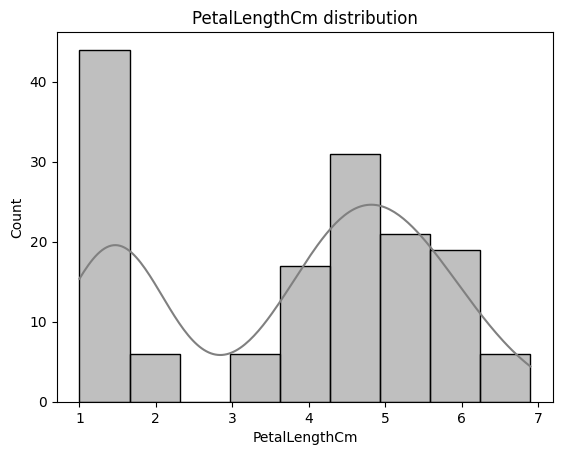

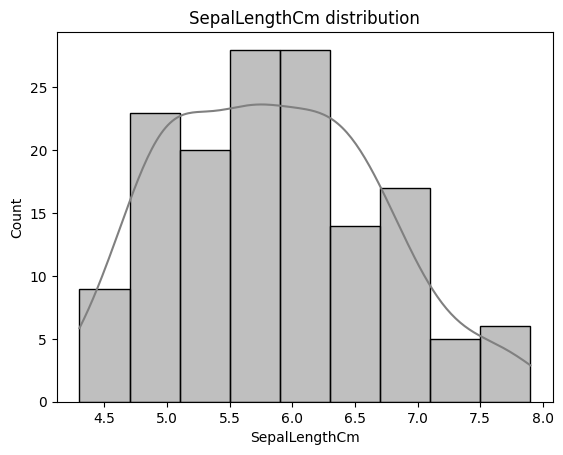

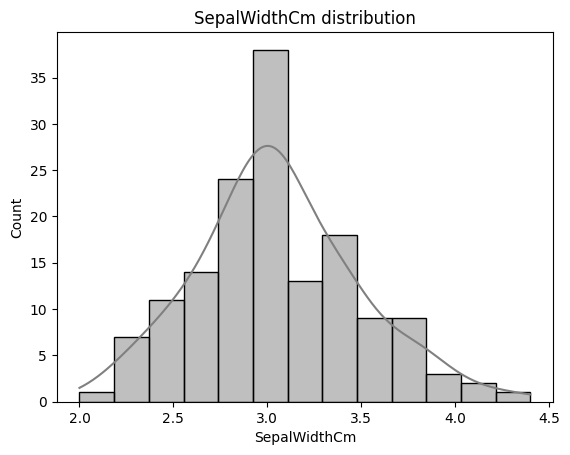

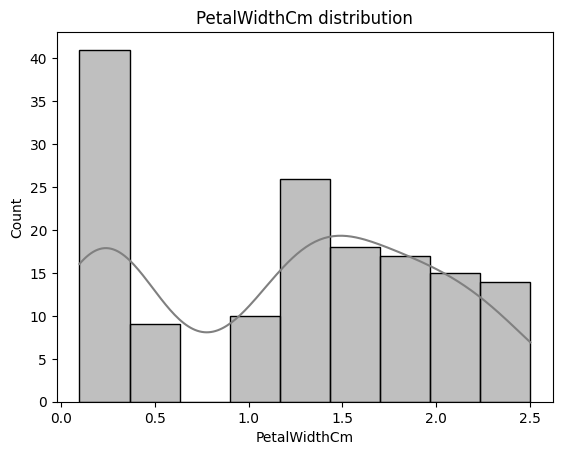


Cross Validation Accuracy:
Logistic Regression: 0.9659770114942529
Random Forest: 0.9521839080459771

Training Logistic Regression...

Test Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



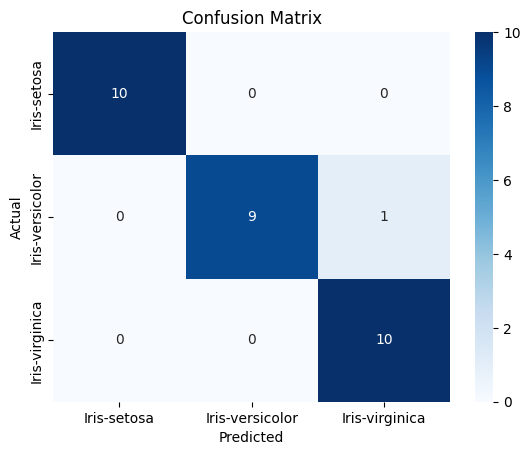


Sample Prediction:
Predicted Species: Iris-setosa


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# -------------------- READING DATA --------------------
columns = [
    "SepalLengthCm",
    "SepalWidthCm",
    "PetalLengthCm",
    "PetalWidthCm",
    "Species"
]

data = pd.read_csv("iris.data", header=None, names=columns)
print("Dataset shape:", data.shape)


# -------------------- CLEANING --------------------
print(data.isna().sum())


# -------------------- VISUALIZATION --------------------
def histplot(column):
    sns.histplot(x=column, kde=True, color="gray")
    plt.title(f"{column.name} distribution")
    plt.show()


histplot(data["PetalLengthCm"])
histplot(data["SepalLengthCm"])
histplot(data["SepalWidthCm"])
histplot(data["PetalWidthCm"])


# -------------------- OUTLIER REMOVAL --------------------
num_cols = [
    "SepalLengthCm",
    "SepalWidthCm",
    "PetalLengthCm",
    "PetalWidthCm"
]

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]


# -------------------- ENCODING --------------------
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])


# -------------------- FEATURE SELECTION --------------------
X = data.drop(columns=["Species"])
y = data["Species"]


# -------------------- TRAIN TEST SPLIT --------------------
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------- CROSS VALIDATION --------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr = LogisticRegression(max_iter=200)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("\nCross Validation Accuracy:")
print("Logistic Regression:", cross_val_score(lr, X, y, cv=kf).mean())
print("Random Forest:", cross_val_score(rf, X, y, cv=kf).mean())


# -------------------- TRAINING (BEST MODEL) --------------------
print("\nTraining Logistic Regression...")
lr.fit(x_train, y_train)


# -------------------- TESTING --------------------
y_pred = lr.predict(x_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# -------------------- CONFUSION MATRIX --------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# -------------------- FINAL PREDICTION (SAMPLE) --------------------
sample = pd.DataFrame({
    "SepalLengthCm": [5.1],
    "SepalWidthCm": [3.5],
    "PetalLengthCm": [1.4],
    "PetalWidthCm": [0.2]
})

prediction = lr.predict(sample)
predicted_species = le.inverse_transform(prediction)

print("\nSample Prediction:")
print("Predicted Species:", predicted_species[0])


In [3]:
#Dataset 2: Loan Amount Prediction : Regression : GBR

Training data shape: (29660, 6)


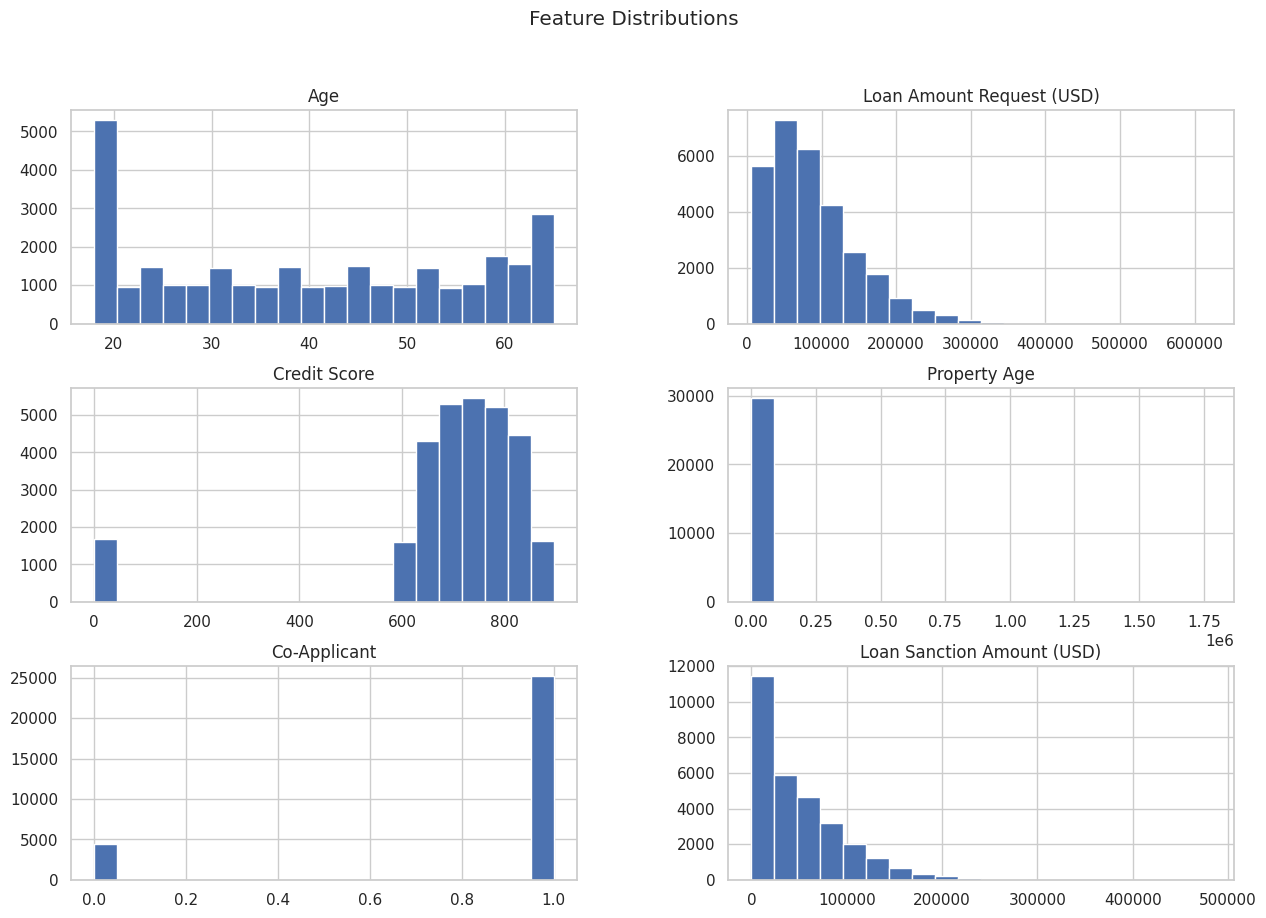

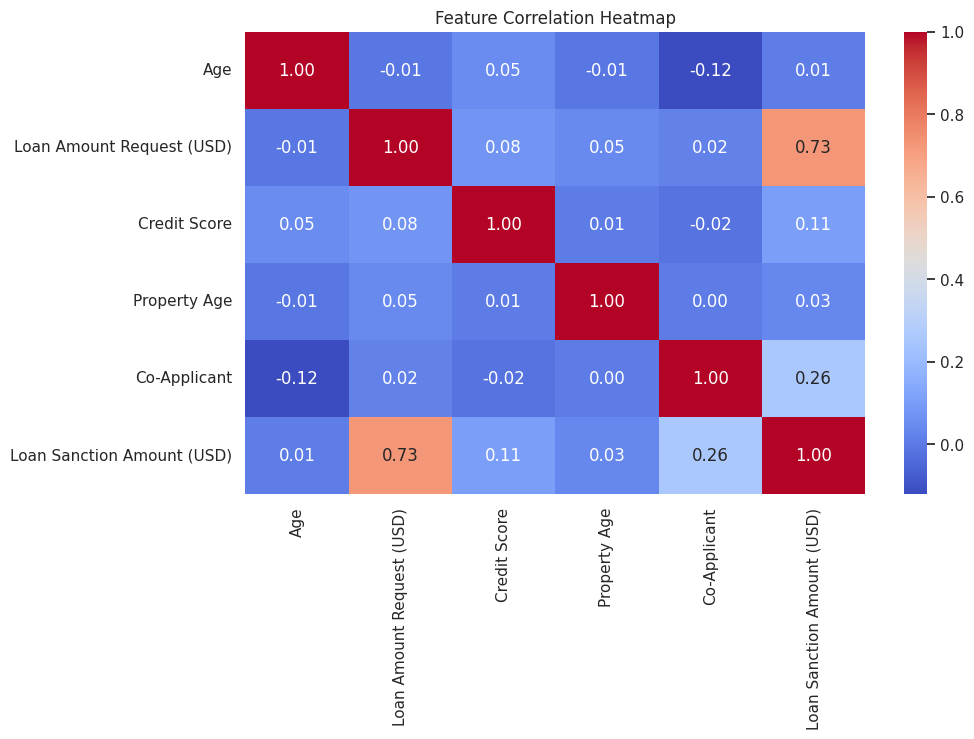

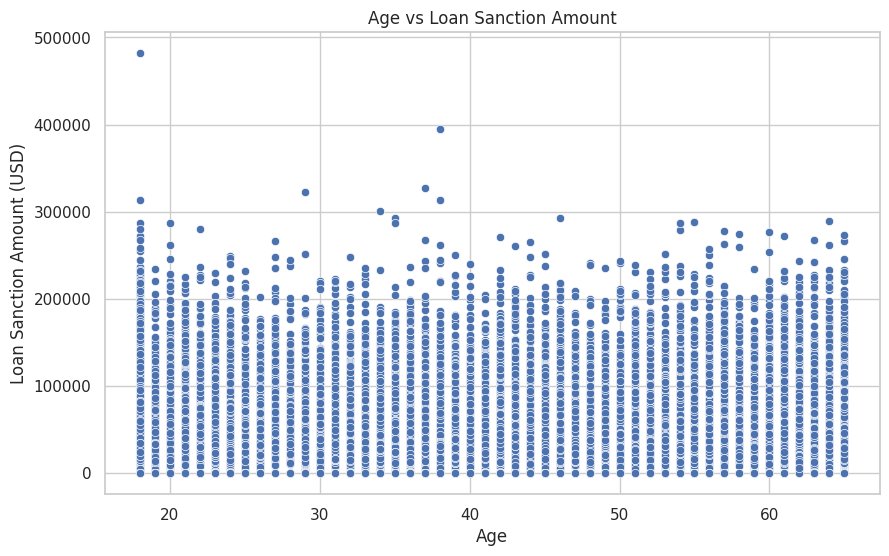

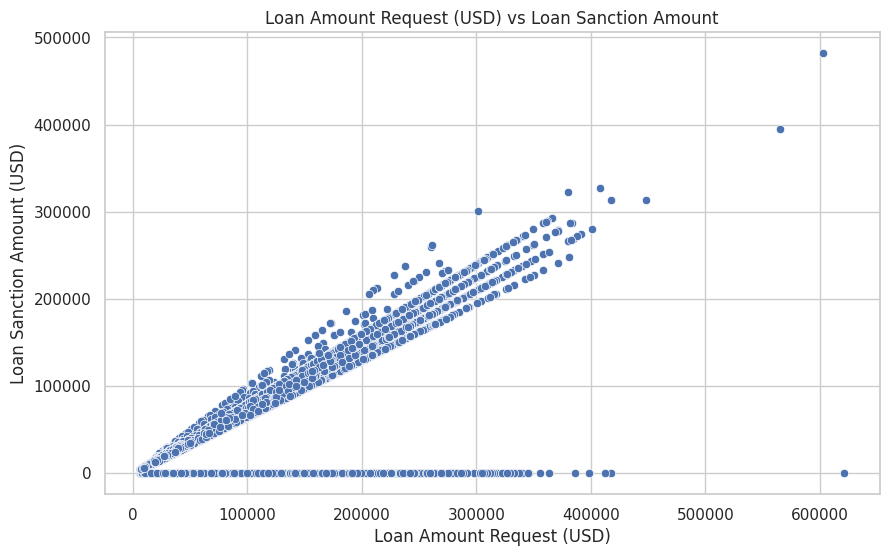

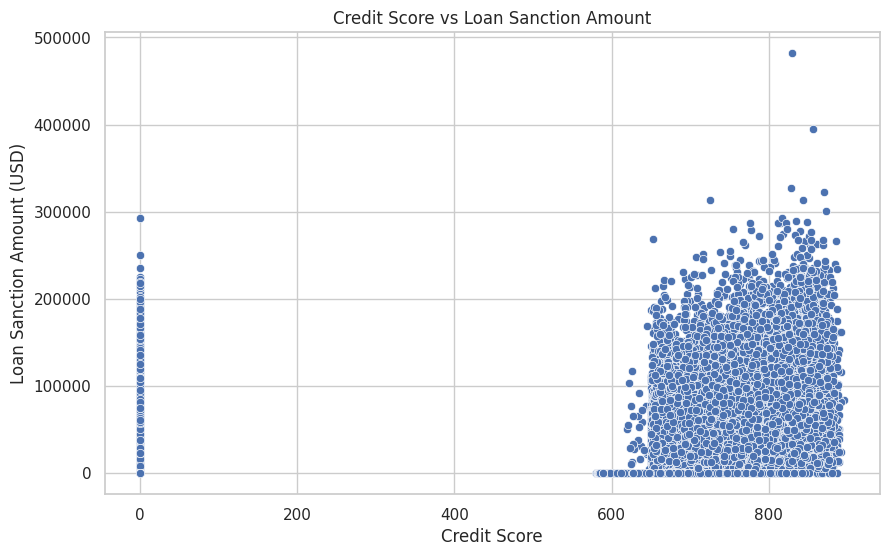

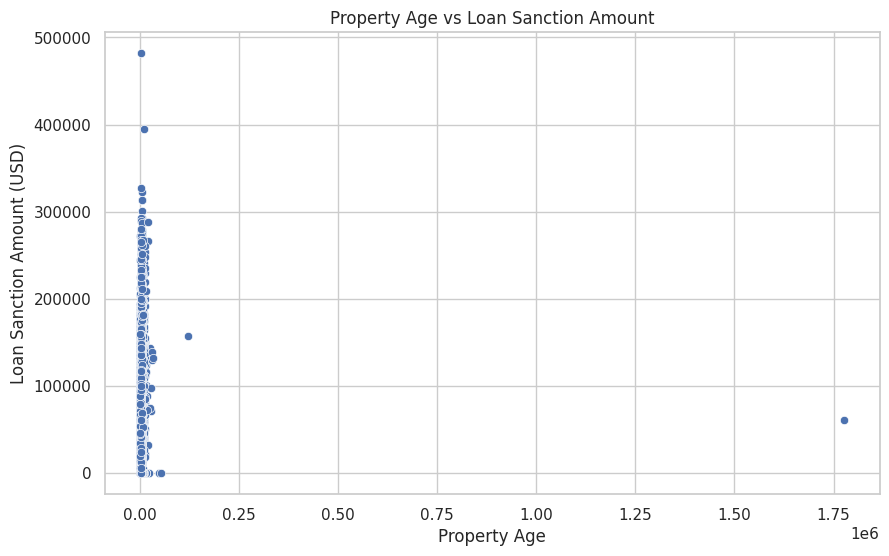

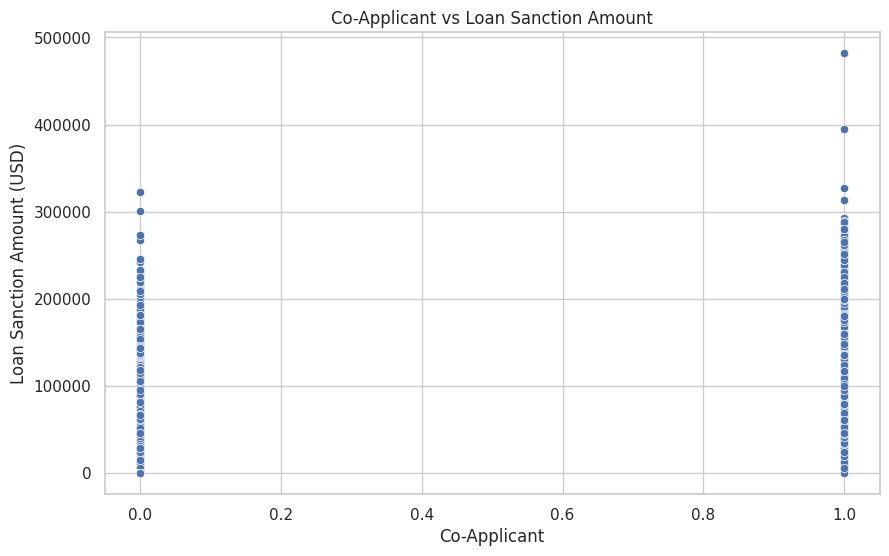


Selected Features: ['Loan Amount Request (USD)', 'Credit Score', 'Co-Applicant']


/tmp/ipykernel_11634/2679235755.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


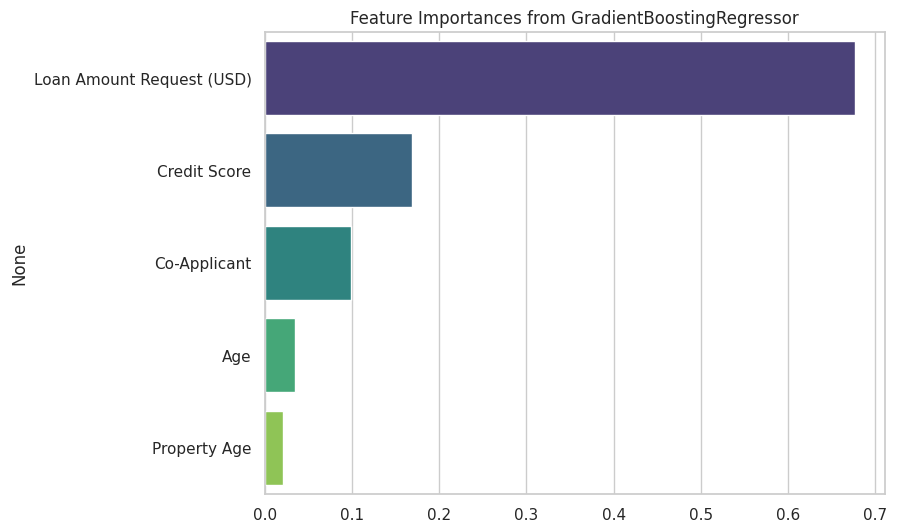


Model Performance:
R2 Score (%): 73.03
Mean Squared Error: 617116354.25
Train Score: 0.7771
Cross-Validation R2 Mean: 0.737


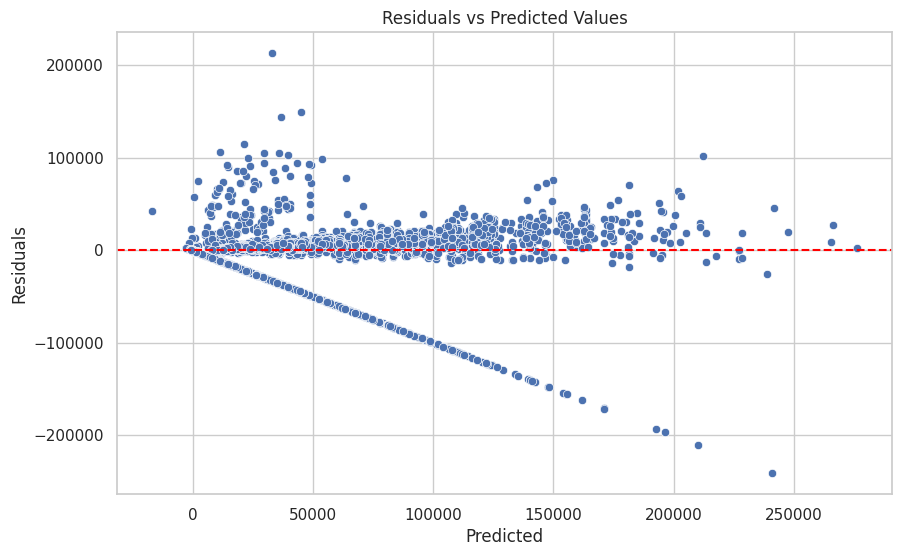

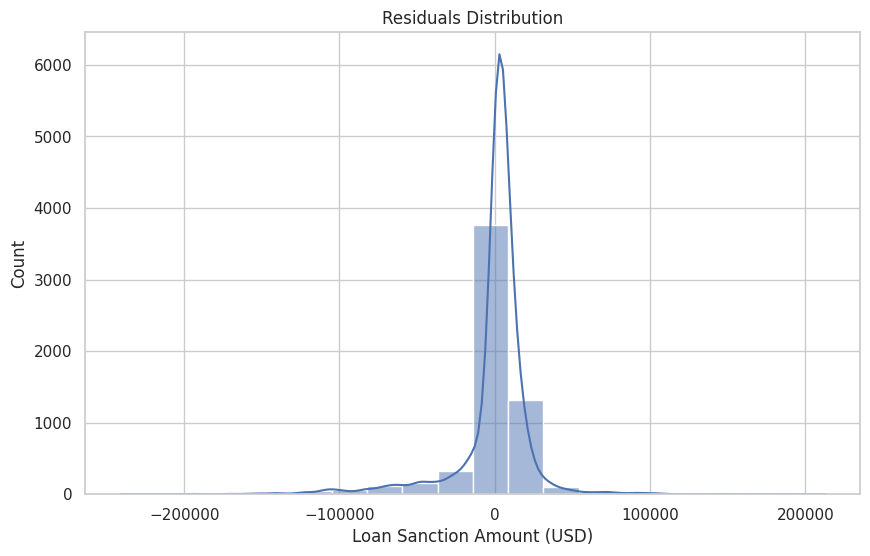

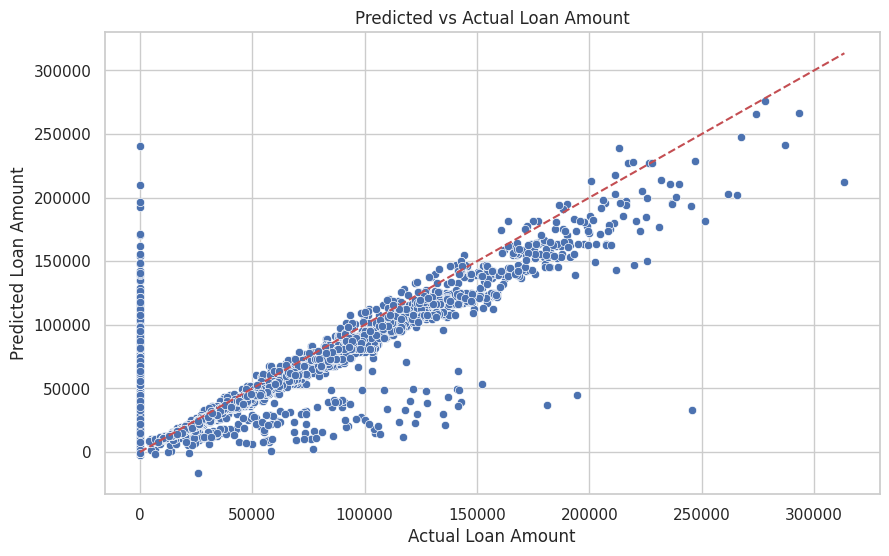


Final Predictions (Sample):
  Customer ID  Loan Sanction Amount (USD)
0     C-36995                49376.896285
1     C-33999                29477.555064
2      C-3770                16322.603291
3     C-26480                52598.651353
4     C-23459                68240.902728

submission.csv file created successfully.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# -------------------- CONFIG --------------------
COLUMNS = ['Age', 'Loan Amount Request (USD)', 'Credit Score',
           'Property Age', 'Co-Applicant', 'Loan Sanction Amount (USD)']

# -------------------- LOAD TRAINING DATA --------------------
training_data = pd.read_csv('loan.csv', usecols=COLUMNS)

# -------------------- CLEANING --------------------
training_data.dropna(subset=['Loan Sanction Amount (USD)'], inplace=True)
training_data['Loan Sanction Amount (USD)'] = training_data['Loan Sanction Amount (USD)'].clip(lower=0)
training_data.loc[(training_data['Co-Applicant'] == -999), 'Co-Applicant'] = 0
training_data['Co-Applicant'] = training_data['Co-Applicant'].astype(int)
training_data['Property Age'] = training_data['Property Age'].fillna(training_data['Property Age'].mean().round(2))
training_data['Credit Score'] = training_data['Credit Score'].fillna(0)

print("Training data shape:", training_data.shape)

# -------------------- DATA DISTRIBUTIONS --------------------
# Plot histogram for each column
training_data.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

# -------------------- CORRELATION HEATMAP --------------------
plt.figure(figsize=(10,6))
sns.heatmap(training_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------- TARGET vs FEATURES --------------------
for col in training_data.drop(columns=['Loan Sanction Amount (USD)']).columns:
    plt.figure()
    sns.scatterplot(x=col, y='Loan Sanction Amount (USD)', data=training_data)
    plt.title(f"{col} vs Loan Sanction Amount")
    plt.show()

# -------------------- TARGET & FEATURES --------------------
y = training_data['Loan Sanction Amount (USD)']
X = training_data.drop(columns=['Loan Sanction Amount (USD)'])

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# -------------------- FEATURE SELECTION --------------------
base_model = GradientBoostingRegressor(
    criterion='squared_error',
    n_estimators=150,
    max_depth=5,
    random_state=21
)
base_model.fit(x_train, y_train)

selector = SelectFromModel(base_model, threshold='median')
selector.fit(x_train, y_train)

selected_features = x_train.columns[selector.get_support()]

x_train_sel = pd.DataFrame(selector.transform(x_train), columns=selected_features, index=x_train.index)
x_test_sel = pd.DataFrame(selector.transform(x_test), columns=selected_features, index=x_test.index)

print("\nSelected Features:", list(selected_features))

# -------------------- FEATURE IMPORTANCE --------------------
feature_importances = pd.Series(base_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title("Feature Importances from GradientBoostingRegressor")
plt.show()

# -------------------- FINAL MODEL --------------------
gbr = GradientBoostingRegressor(
    warm_start=True,
    criterion='squared_error',
    max_depth=5,
    n_estimators=150,
    n_iter_no_change=10,
    random_state=21
)
gbr.fit(x_train_sel, y_train)

predictions = gbr.predict(x_test_sel)

# -------------------- PERFORMANCE --------------------
print("\nModel Performance:")
print("R2 Score (%):", round(100 * r2_score(y_test, predictions), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, predictions), 2))
print("Train Score:", round(gbr.score(x_train_sel, y_train), 4))

# Cross-validation
X_sel = pd.DataFrame(selector.transform(X), columns=selected_features, index=X.index)
cv_scores = cross_validate(gbr, X_sel, y, cv=6, scoring='r2')
print("Cross-Validation R2 Mean:", round(cv_scores['test_score'].mean(), 4))

# -------------------- RESIDUAL PLOTS --------------------
residuals = y_test - predictions
plt.figure()
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

plt.figure()
sns.histplot(residuals, bins=20, kde=True)
plt.title("Residuals Distribution")
plt.show()

# -------------------- PREDICT vs ACTUAL --------------------
plt.figure()
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Predicted vs Actual Loan Amount")
plt.show()

# -------------------- TEST DATA & FINAL PREDICTION --------------------
test_columns = ['Customer ID', 'Age', 'Loan Amount Request (USD)', 'Credit Score',
                'Property Age', 'Co-Applicant']
test_data_full = pd.read_csv('loan.csv', usecols=test_columns)
CUST_ID = test_data_full['Customer ID']

test_data = test_data_full.drop(columns=['Customer ID'])
test_data.loc[test_data['Co-Applicant'].isin(['?', -999]), 'Co-Applicant'] = 0
test_data['Co-Applicant'] = test_data['Co-Applicant'].astype(int)
test_data['Property Age'] = test_data['Property Age'].fillna(training_data['Property Age'].mean().round(2))
test_data['Credit Score'] = test_data['Credit Score'].fillna(0)

test_data_sel = pd.DataFrame(selector.transform(test_data), columns=selected_features, index=test_data.index)
final_predictions = gbr.predict(test_data_sel)

submission = pd.DataFrame({
    'Customer ID': CUST_ID,
    'Loan Sanction Amount (USD)': final_predictions
})

print("\nFinal Predictions (Sample):")
print(submission.head())

submission.to_csv('submission.csv', index=False)
print("\nsubmission.csv file created successfully.")


In [ ]:
#Dataset 3 : Diabetes Prediction : Classification Task : Logistic  Regression

NaN values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


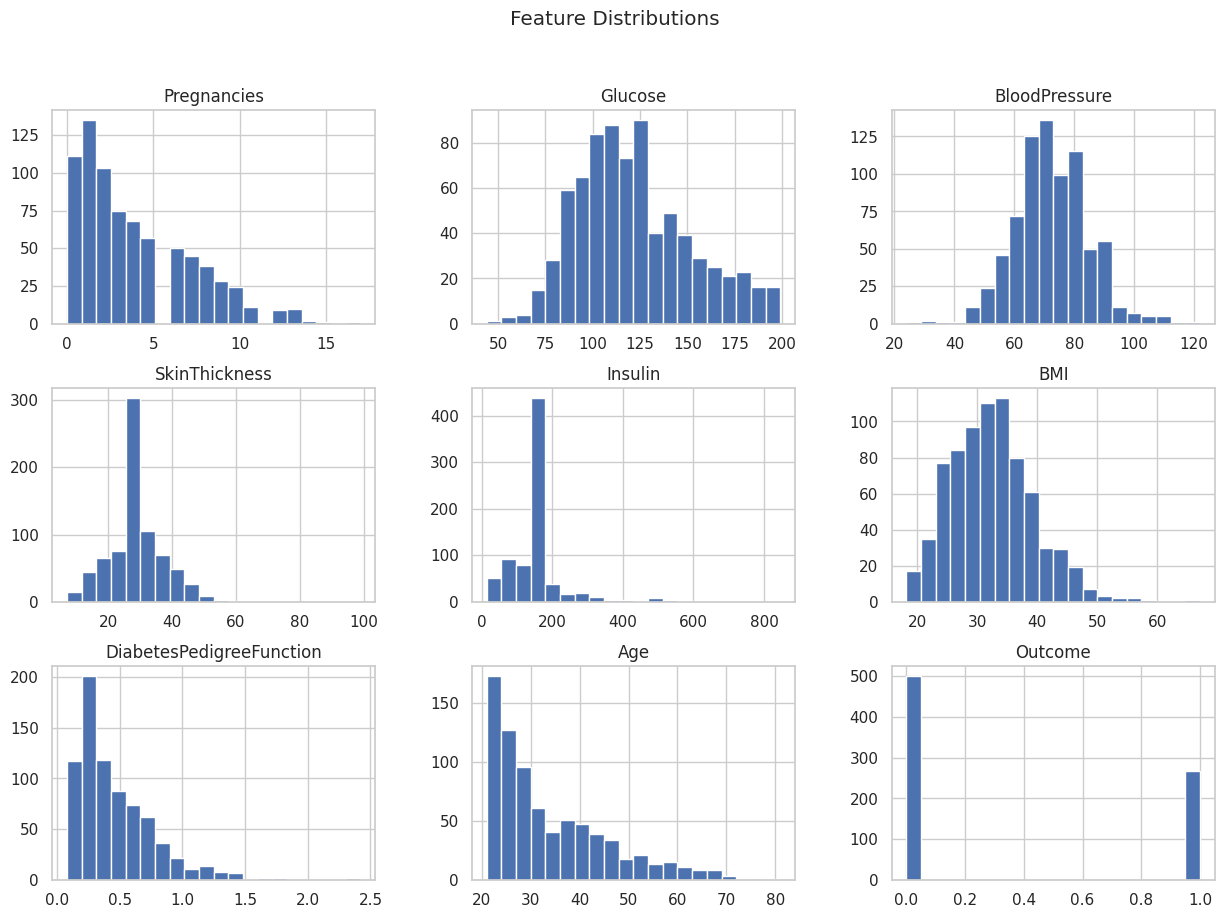

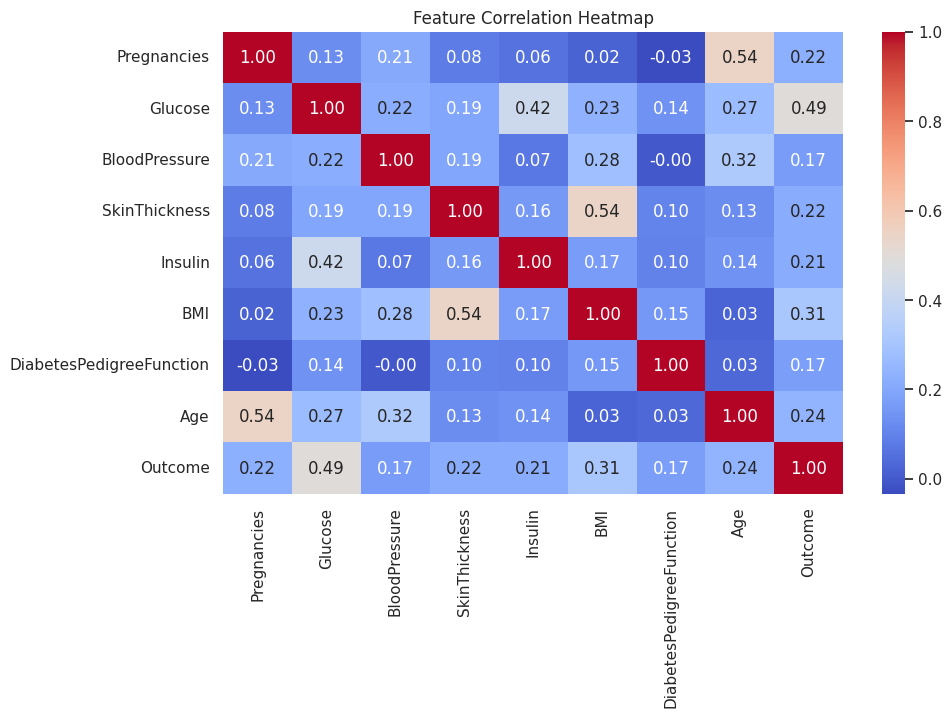

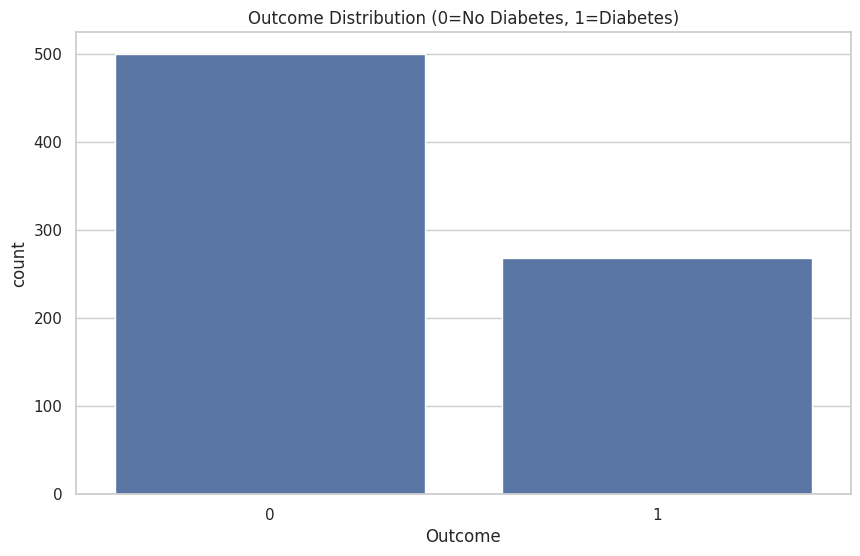

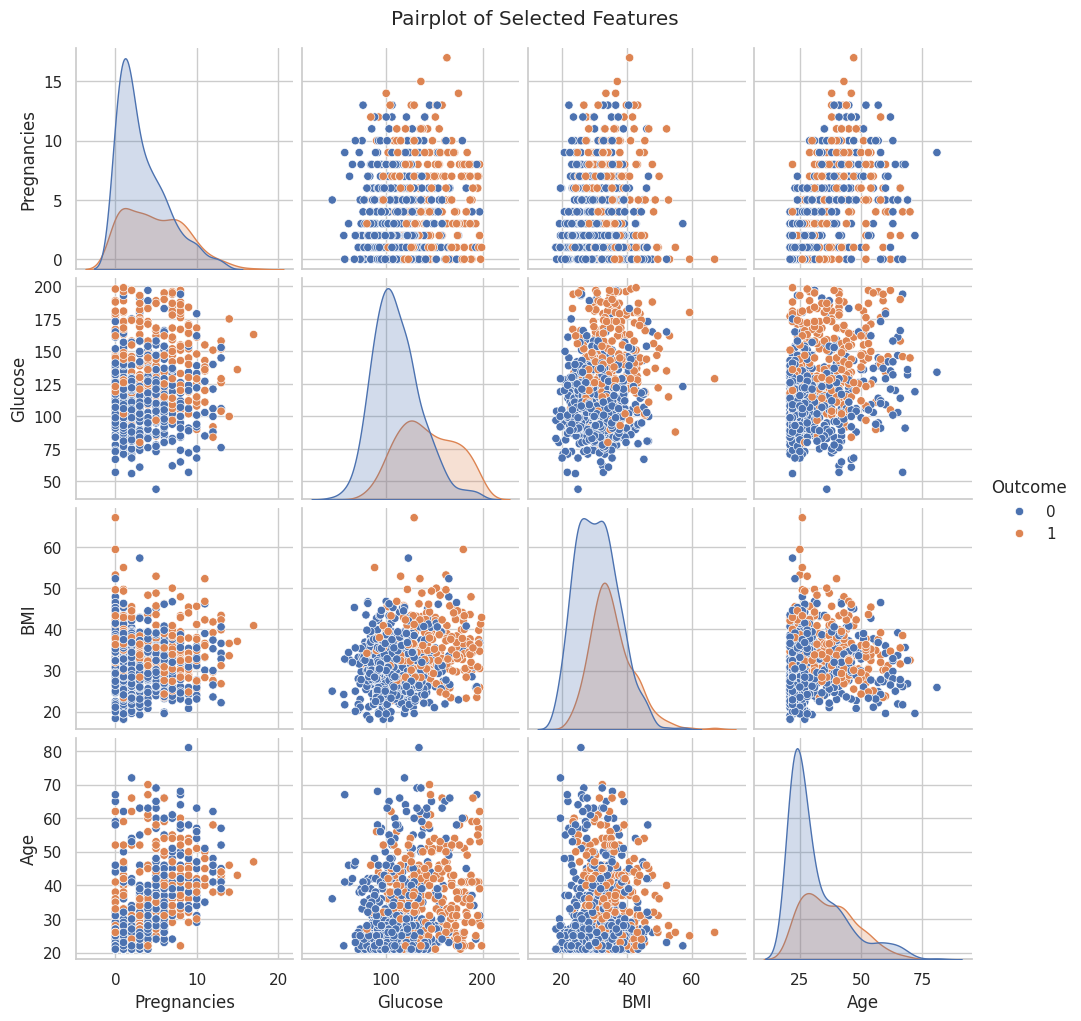

Logistic Regression CV Mean Accuracy: 0.7850
Random Forest CV Mean Accuracy: 0.7753
SVM CV Mean Accuracy: 0.7655
KNN CV Mean Accuracy: 0.7460
Gradient Boosting CV Mean Accuracy: 0.7557

Best Model: Logistic Regression
Confusion Matrix:
 [[81 19]
 [28 26]]
Accuracy: 0.6948

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



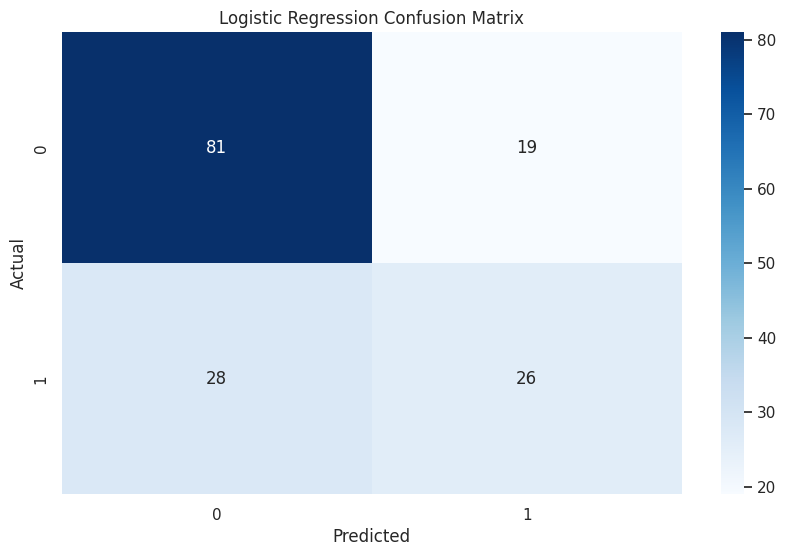

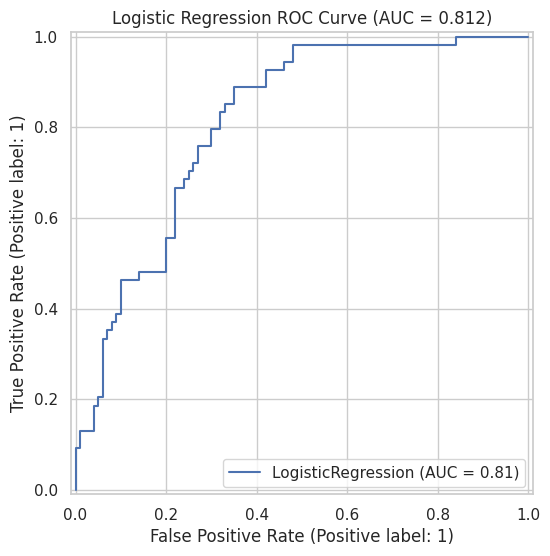

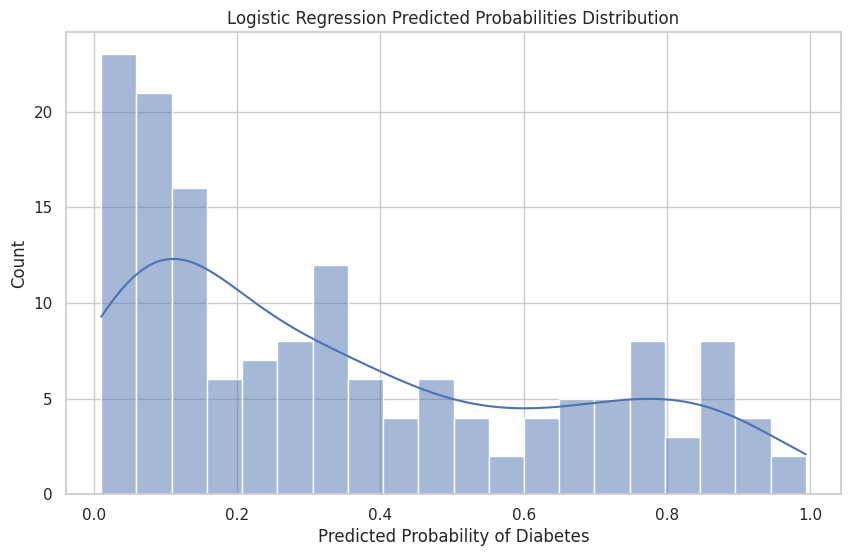

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# -------------------- LOAD DATA --------------------
dataset = pd.read_csv('diabetes.xls')

# -------------------- CLEAN DATA --------------------
dataset_clean = dataset.copy()

# Replace 0 with NaN in specific columns
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dataset_clean[cols_with_zeros] = dataset_clean[cols_with_zeros].replace(0, np.nan)

# Fill NaN with column means (avoid chained assignment)
dataset_clean[cols_with_zeros] = dataset_clean[cols_with_zeros].fillna(dataset_clean[cols_with_zeros].mean())

print("NaN values after cleaning:\n", dataset_clean.isnull().sum())

# -------------------- DATA DISTRIBUTIONS --------------------
dataset_clean.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

# -------------------- CORRELATION HEATMAP --------------------
plt.figure(figsize=(10,6))
sns.heatmap(dataset_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# -------------------- TARGET DISTRIBUTION --------------------
sns.countplot(x='Outcome', data=dataset_clean)
plt.title("Outcome Distribution (0=No Diabetes, 1=Diabetes)")
plt.show()

# -------------------- PAIRPLOT --------------------
# Only for smaller datasets or selected columns
selected_features = ["Pregnancies", "Glucose", "BMI", "Age", "Outcome"]
sns.pairplot(dataset_clean[selected_features], hue="Outcome", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# -------------------- FEATURES & TARGET --------------------
X = dataset_clean.drop('Outcome', axis=1)
y = dataset_clean['Outcome']

# -------------------- SCALE FEATURES --------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- TRAIN-TEST SPLIT --------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------- DEFINE MODELS --------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# -------------------- CROSS-VALIDATION --------------------
best_model = None
best_score = 0
best_model_name = ""

for name, model in models.items():
    cv_score = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy').mean()
    print(f"{name} CV Mean Accuracy: {cv_score:.4f}")
    if cv_score > best_score:
        best_score = cv_score
        best_model = model
        best_model_name = name

# -------------------- TRAIN BEST MODEL --------------------
best_model.fit(X_train, Y_train)

# -------------------- PREDICTION & EVALUATION --------------------
y_pred = best_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

print(f"\nBest Model: {best_model_name}")
print("Confusion Matrix:\n", cm)
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# -------------------- CONFUSION MATRIX HEATMAP --------------------
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"{best_model_name} Confusion Matrix")
plt.show()

# -------------------- FEATURE IMPORTANCE (if applicable) --------------------
if best_model_name in ["Random Forest", "Gradient Boosting"]:
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
    plt.title(f"{best_model_name} Feature Importances")
    plt.show()

# -------------------- ROC CURVE --------------------
y_proba = best_model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(Y_test, y_proba)
RocCurveDisplay.from_estimator(best_model, X_test, Y_test)
plt.title(f"{best_model_name} ROC Curve (AUC = {roc_auc:.3f})")
plt.show()

# -------------------- PREDICTIONS DISTRIBUTION --------------------
sns.histplot(y_proba, bins=20, kde=True)
plt.title(f"{best_model_name} Predicted Probabilities Distribution")
plt.xlabel("Predicted Probability of Diabetes")
plt.show()


In [ ]:
#Dataset 4 : Email Spam : Classification : KNN - Classification

No of null rows (email column) after filling: 0


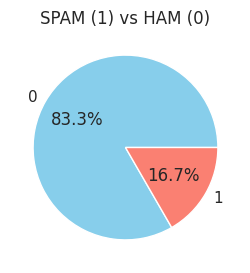

Accuracy for each fold: [0.75       0.96875    0.875      0.875      0.875      0.9375
 0.90625    0.875      0.9375     0.875      0.875      0.84375
 0.9375     0.90625    0.90625    0.96875    0.9375     0.875
 0.9375     0.8125     0.875      0.9375     0.96875    0.96875
 0.875      0.84375    0.875      0.90625    0.90625    0.9375
 0.875      0.875      0.8125     0.90625    0.9375     0.875
 0.875      0.75       0.875      0.9375     0.9375     0.9375
 0.84375    0.90625    0.9375     0.875      0.96875    0.9375
 0.90625    0.875      0.875      0.96875    0.90625    0.875
 0.90625    0.77419355 0.87096774 0.93548387 0.83870968 0.80645161
 0.90322581 0.96774194 0.96774194 0.90322581 0.90322581 0.87096774
 0.77419355 0.90322581 0.87096774 0.93548387 0.90322581 0.90322581
 0.93548387 0.77419355 0.96774194 0.83870968 0.87096774 0.93548387
 0.87096774 0.90322581 0.96774194 0.90322581 0.90322581 0.87096774
 0.93548387 0.93548387 0.90322581 0.96774194 0.90322581 0.83870968
 0.90322

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# -------------------- LOAD DATA --------------------
df = pd.read_csv('spam_or_not_spam.csv')

# -------------------- DATA CLEANING --------------------
# Fill missing email values using ffill (no inplace, avoids warnings)
df['email'] = df['email'].ffill()

# Check missing values
n = df['email'].isnull().sum()
print("No of null rows (email column) after filling:", n)

# -------------------- DATA VISUALISATION --------------------
plt.figure(figsize=(3,3))
spam_ham = df['label'].value_counts(sort=True)
spam_ham.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title('SPAM (1) vs HAM (0)')
plt.ylabel("")
plt.show()

# -------------------- FEATURES & TARGET --------------------
X = df['email']
y = df['label']

# -------------------- PIPELINE: TFIDF + KNN --------------------
model_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# -------------------- CROSS-VALIDATION --------------------
n_splits = 95
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

scores = cross_val_score(estimator=model_pipeline, X=X, y=y, cv=skf, scoring='accuracy')

print(f"Accuracy for each fold: {scores}")
print(f"Mean accuracy: {np.mean(scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(scores):.4f}")
